In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import Input
from keras.wrappers.scikit_learn import KerasRegressor
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
#from sklearn.model_selection import cross_val_score
#from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

from sklearn import metrics

import matplotlib.pyplot as plt

import io
import os

from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD

from keras import regularizers
import time
import time

from keras import regularizers
from scipy import stats
import seaborn as sns
import pickle
from keras.callbacks import ModelCheckpoint, TensorBoard, EarlyStopping, ReduceLROnPlateau

from keras.models import Model, load_model

from sklearn.model_selection import train_test_split


from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve
from sklearn.metrics import precision_recall_fscore_support, f1_score
from sklearn.preprocessing import StandardScaler

/home/kodzo.apedo/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/kodzo.apedo/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#chargement des donnees 

df = pd.read_csv('/home/kodzo.apedo/Bureau/Visu/mesdonnees/mesdonnees.csv')

In [3]:
ds = df.values

In [4]:
RANDOM_SEED = 42 #used to help randomly select the data points
TEST_PCT = 0.30 

In [5]:
X = ds[:,0:34].astype(float)
Y = ds[:,34]

In [6]:
#Encodons la classe "Classe"

encoder = LabelEncoder()
encoder.fit(Y)
encoder_Y = encoder.transform(Y)

In [7]:
encoder_Y

array([ 1,  1,  1, ..., 19, 19, 19])

In [8]:
# Redefinissons nos classe

dummy_y = np_utils.to_categorical(encoder_Y)

In [9]:
Yd = dummy_y

In [10]:
X_train, X_test, Yd_train, Yd_test = train_test_split(X, Yd, test_size = TEST_PCT, random_state = RANDOM_SEED)

In [11]:
nb_class = 20 # Nombre de classe

nb_epoch = 300

batch_size = 1000

#Couche d'entrée

input_dim = X_train.shape[1] #numbre de colonne, 

encoding_dim = 300 # Dimension d'encodage
nb_class = 20 # Nombre de classe
hidden_dim = encoding_dim - 100 #i.e. 7

hidden_dim2 = hidden_dim - 100

#hidden_dim3 = hidden_dim + 30

learning_rate = 1e-7

In [12]:

#Debut du decompte du temps
start_time = time.time()

input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation='tanh', 
                activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(hidden_dim, activation='tanh')(encoder)
encoder = Dense(hidden_dim2, activation='relu')(encoder)
encoder = Dense(input_dim, activation='relu')(encoder)


print("Temps d execution : %s secondes ---" %(time.time() - start_time))


Temps d execution : 0.29173898696899414 secondes ---


In [13]:
autoencoder = Model(inputs=input_layer, outputs=encoder)

autoencoder.summary()

autoencoder.compile(metrics=['accuracy'],
                    loss='mean_squared_error',
                    optimizer='adam')

cp = ModelCheckpoint(filepath="ENCODER-FOR-PRED-3.h5",
                               save_best_only=True,
                               verbose=0)



history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test), callbacks = [cp]).history

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 34)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 300)               10500     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_4 (Dense)              (None, 34)                3434      
Total params: 94,234
Trainable params: 94,234
Non-trainable params: 0
_________________________________________________________________
Train on 279986 samples, validate on 119995 samples
Epoch 1/300
279986/279986 [==============================] - 38s 137us/step - loss: 0.

279986/279986 [==============================] - 45s 162us/step - loss: 0.1708 - acc: 0.8165 - val_loss: 0.1724 - val_acc: 0.8265
Epoch 52/300
279986/279986 [==============================] - 47s 167us/step - loss: 0.1699 - acc: 0.8245 - val_loss: 0.1682 - val_acc: 0.8386
Epoch 53/300
279986/279986 [==============================] - 47s 169us/step - loss: 0.1725 - acc: 0.8154 - val_loss: 0.1694 - val_acc: 0.7955
Epoch 54/300
279986/279986 [==============================] - 47s 167us/step - loss: 0.1697 - acc: 0.8275 - val_loss: 0.1692 - val_acc: 0.8136
Epoch 55/300
279986/279986 [==============================] - 46s 166us/step - loss: 0.1712 - acc: 0.8167 - val_loss: 0.1735 - val_acc: 0.7814
Epoch 56/300
279986/279986 [==============================] - 46s 165us/step - loss: 0.1717 - acc: 0.8154 - val_loss: 0.1700 - val_acc: 0.8049
Epoch 57/300
279986/279986 [==============================] - 43s 154us/step - loss: 0.1706 - acc: 0.8212 - val_loss: 0.1688 - val_acc: 0.8289
Epoch 58/300

279986/279986 [==============================] - 45s 161us/step - loss: 0.1702 - acc: 0.8023 - val_loss: 0.1714 - val_acc: 0.7951
Epoch 109/300
279986/279986 [==============================] - 48s 170us/step - loss: 0.1696 - acc: 0.8115 - val_loss: 0.1682 - val_acc: 0.8374
Epoch 110/300
279986/279986 [==============================] - 44s 157us/step - loss: 0.1702 - acc: 0.8158 - val_loss: 0.1728 - val_acc: 0.7741
Epoch 111/300
279986/279986 [==============================] - 48s 170us/step - loss: 0.1706 - acc: 0.7956 - val_loss: 0.1684 - val_acc: 0.8231
Epoch 112/300
279986/279986 [==============================] - 46s 166us/step - loss: 0.1694 - acc: 0.8148 - val_loss: 0.1682 - val_acc: 0.8244
Epoch 113/300
279986/279986 [==============================] - 53s 190us/step - loss: 0.1703 - acc: 0.8067 - val_loss: 0.1697 - val_acc: 0.8198
Epoch 114/300
279986/279986 [==============================] - 50s 179us/step - loss: 0.1699 - acc: 0.8076 - val_loss: 0.1687 - val_acc: 0.8188
Epoch 

Epoch 165/300
279986/279986 [==============================] - 45s 161us/step - loss: 0.1686 - acc: 0.8304 - val_loss: 0.1679 - val_acc: 0.8447
Epoch 166/300
279986/279986 [==============================] - 46s 166us/step - loss: 0.1685 - acc: 0.8318 - val_loss: 0.1681 - val_acc: 0.8438
Epoch 167/300
279986/279986 [==============================] - 43s 154us/step - loss: 0.1697 - acc: 0.8184 - val_loss: 0.1697 - val_acc: 0.8318
Epoch 168/300
279986/279986 [==============================] - 43s 154us/step - loss: 0.1780 - acc: 0.7781 - val_loss: 0.1696 - val_acc: 0.8276
Epoch 169/300
279986/279986 [==============================] - 43s 155us/step - loss: 0.1689 - acc: 0.8399 - val_loss: 0.1681 - val_acc: 0.8415
Epoch 170/300
279986/279986 [==============================] - 44s 156us/step - loss: 0.1685 - acc: 0.8425 - val_loss: 0.1689 - val_acc: 0.8344
Epoch 171/300
279986/279986 [==============================] - 43s 155us/step - loss: 0.1685 - acc: 0.8414 - val_loss: 0.1684 - val_acc:

Epoch 222/300
279986/279986 [==============================] - 43s 155us/step - loss: 0.1689 - acc: 0.8305 - val_loss: 0.1678 - val_acc: 0.8527
Epoch 223/300
279986/279986 [==============================] - 43s 153us/step - loss: 0.1680 - acc: 0.8459 - val_loss: 0.1679 - val_acc: 0.8428
Epoch 224/300
279986/279986 [==============================] - 43s 154us/step - loss: 0.1731 - acc: 0.8037 - val_loss: 0.1687 - val_acc: 0.8227
Epoch 225/300
279986/279986 [==============================] - 43s 152us/step - loss: 0.1691 - acc: 0.8321 - val_loss: 0.1680 - val_acc: 0.8332
Epoch 226/300
279986/279986 [==============================] - 44s 156us/step - loss: 0.1681 - acc: 0.8432 - val_loss: 0.1678 - val_acc: 0.8493
Epoch 227/300
279986/279986 [==============================] - 43s 155us/step - loss: 0.1679 - acc: 0.8453 - val_loss: 0.1681 - val_acc: 0.8255
Epoch 228/300
279986/279986 [==============================] - 43s 154us/step - loss: 0.1680 - acc: 0.8432 - val_loss: 0.1682 - val_acc:

Epoch 279/300
279986/279986 [==============================] - 43s 155us/step - loss: 0.1684 - acc: 0.8298 - val_loss: 0.1710 - val_acc: 0.8319
Epoch 280/300
279986/279986 [==============================] - 43s 154us/step - loss: 0.1699 - acc: 0.8132 - val_loss: 0.1728 - val_acc: 0.7829
Epoch 281/300
279986/279986 [==============================] - 44s 156us/step - loss: 0.1683 - acc: 0.8367 - val_loss: 0.1678 - val_acc: 0.8483
Epoch 282/300
279986/279986 [==============================] - 44s 158us/step - loss: 0.1700 - acc: 0.8232 - val_loss: 0.1735 - val_acc: 0.8127
Epoch 283/300
279986/279986 [==============================] - 44s 157us/step - loss: 0.1703 - acc: 0.8230 - val_loss: 0.1686 - val_acc: 0.8390
Epoch 284/300
279986/279986 [==============================] - 45s 161us/step - loss: 0.1696 - acc: 0.8229 - val_loss: 0.1689 - val_acc: 0.8228
Epoch 285/300
279986/279986 [==============================] - 44s 159us/step - loss: 0.1682 - acc: 0.8393 - val_loss: 0.1678 - val_acc:

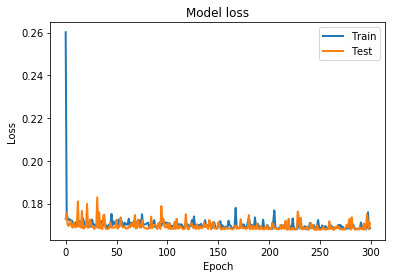

In [14]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

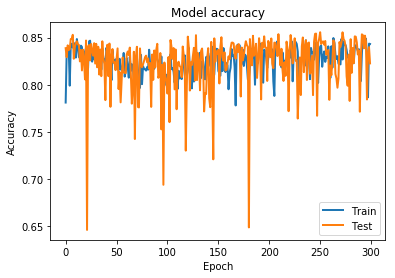

In [15]:
plt.plot(history['acc'], linewidth=2, label='Train')
plt.plot(history['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [16]:
#Debut du decompte du temps
start_time = time.time()



model = Sequential()
model.add(autoencoder)
#model.add(Dropout(0.5))
model.add(Dense(500, activation ='relu'))
#model.add(Dropout(0.3))
model.add(Dense(300, activation ='relu'))
#model.add(Dropout(0.2))
model.add(Dense(100, activation ='relu'))
model.add(Dropout(0.1))
model.add(Dense(nb_class, activation ='sigmoid'))


model.compile(metrics=['accuracy'], loss = 'mse', 
              optimizer='adam')

model.summary()


checkpointer = ModelCheckpoint(filepath='COMB-PRED-3.h5', 
                               verbose=2, save_best_only=True)



history = model.fit(X_train, Yd_train,
             validation_data=(X_test, Yd_test),
             epochs= nb_epoch,
             batch_size=batch_size,
             shuffle=True,
             verbose=2, callbacks=[checkpointer]).history


score, acc = model.evaluate(X_test, y = Yd_test, 
               batch_size = batch_size, 
               verbose = 1)



print("Temps d execution : %s secondes ---" %(time.time() - start_time))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 34)                94234     
_________________________________________________________________
dense_5 (Dense)              (None, 500)               17500     
_________________________________________________________________
dense_6 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 20)                2020      
Total params: 294,154
Trainable params: 294,154
Non-trainable params: 0
_________________________________________________________________
Trai

 - 91s - loss: 0.0036 - acc: 0.9584 - val_loss: 0.0032 - val_acc: 0.9614

Epoch 00045: val_loss did not improve from 0.00315
Epoch 46/300
 - 91s - loss: 0.0037 - acc: 0.9577 - val_loss: 0.0031 - val_acc: 0.9624

Epoch 00046: val_loss improved from 0.00315 to 0.00307, saving model to COMB-PRED-3.h5
Epoch 47/300
 - 90s - loss: 0.0033 - acc: 0.9610 - val_loss: 0.0034 - val_acc: 0.9591

Epoch 00047: val_loss did not improve from 0.00307
Epoch 48/300
 - 91s - loss: 0.0035 - acc: 0.9595 - val_loss: 0.0035 - val_acc: 0.9592

Epoch 00048: val_loss did not improve from 0.00307
Epoch 49/300
 - 91s - loss: 0.0034 - acc: 0.9604 - val_loss: 0.0033 - val_acc: 0.9599

Epoch 00049: val_loss did not improve from 0.00307
Epoch 50/300
 - 91s - loss: 0.0034 - acc: 0.9600 - val_loss: 0.0032 - val_acc: 0.9612

Epoch 00050: val_loss did not improve from 0.00307
Epoch 51/300
 - 94s - loss: 0.0034 - acc: 0.9604 - val_loss: 0.0040 - val_acc: 0.9515

Epoch 00051: val_loss did not improve from 0.00307
Epoch 52/30

 - 85s - loss: 0.0027 - acc: 0.9696 - val_loss: 0.0025 - val_acc: 0.9709

Epoch 00102: val_loss improved from 0.00253 to 0.00249, saving model to COMB-PRED-3.h5
Epoch 103/300
 - 94s - loss: 0.0027 - acc: 0.9693 - val_loss: 0.0025 - val_acc: 0.9710

Epoch 00103: val_loss did not improve from 0.00249
Epoch 104/300
 - 91s - loss: 0.0027 - acc: 0.9695 - val_loss: 0.0028 - val_acc: 0.9678

Epoch 00104: val_loss did not improve from 0.00249
Epoch 105/300
 - 82s - loss: 0.0027 - acc: 0.9697 - val_loss: 0.0029 - val_acc: 0.9674

Epoch 00105: val_loss did not improve from 0.00249
Epoch 106/300
 - 83s - loss: 0.0029 - acc: 0.9686 - val_loss: 0.0035 - val_acc: 0.9632

Epoch 00106: val_loss did not improve from 0.00249
Epoch 107/300
 - 83s - loss: 0.0027 - acc: 0.9706 - val_loss: 0.0027 - val_acc: 0.9691

Epoch 00107: val_loss did not improve from 0.00249
Epoch 108/300
 - 84s - loss: 0.0027 - acc: 0.9700 - val_loss: 0.0027 - val_acc: 0.9689

Epoch 00108: val_loss did not improve from 0.00249
Epoch

 - 88s - loss: 0.0023 - acc: 0.9757 - val_loss: 0.0021 - val_acc: 0.9770

Epoch 00159: val_loss improved from 0.00214 to 0.00207, saving model to COMB-PRED-3.h5
Epoch 160/300
 - 88s - loss: 0.0023 - acc: 0.9757 - val_loss: 0.0023 - val_acc: 0.9750

Epoch 00160: val_loss did not improve from 0.00207
Epoch 161/300
 - 87s - loss: 0.0023 - acc: 0.9757 - val_loss: 0.0024 - val_acc: 0.9747

Epoch 00161: val_loss did not improve from 0.00207
Epoch 162/300
 - 88s - loss: 0.0024 - acc: 0.9746 - val_loss: 0.0027 - val_acc: 0.9720

Epoch 00162: val_loss did not improve from 0.00207
Epoch 163/300
 - 88s - loss: 0.0023 - acc: 0.9751 - val_loss: 0.0023 - val_acc: 0.9753

Epoch 00163: val_loss did not improve from 0.00207
Epoch 164/300
 - 88s - loss: 0.0025 - acc: 0.9740 - val_loss: 0.0031 - val_acc: 0.9676

Epoch 00164: val_loss did not improve from 0.00207
Epoch 165/300
 - 88s - loss: 0.0023 - acc: 0.9754 - val_loss: 0.0022 - val_acc: 0.9759

Epoch 00165: val_loss did not improve from 0.00207
Epoch

 - 88s - loss: 0.0022 - acc: 0.9778 - val_loss: 0.0020 - val_acc: 0.9774

Epoch 00217: val_loss did not improve from 0.00191
Epoch 218/300
 - 88s - loss: 0.0023 - acc: 0.9769 - val_loss: 0.0026 - val_acc: 0.9740

Epoch 00218: val_loss did not improve from 0.00191
Epoch 219/300
 - 89s - loss: 0.0026 - acc: 0.9745 - val_loss: 0.0021 - val_acc: 0.9782

Epoch 00219: val_loss did not improve from 0.00191
Epoch 220/300
 - 88s - loss: 0.0023 - acc: 0.9773 - val_loss: 0.0022 - val_acc: 0.9769

Epoch 00220: val_loss did not improve from 0.00191
Epoch 221/300
 - 87s - loss: 0.0022 - acc: 0.9778 - val_loss: 0.0024 - val_acc: 0.9752

Epoch 00221: val_loss did not improve from 0.00191
Epoch 222/300
 - 89s - loss: 0.0023 - acc: 0.9772 - val_loss: 0.0028 - val_acc: 0.9697

Epoch 00222: val_loss did not improve from 0.00191
Epoch 223/300
 - 88s - loss: 0.0025 - acc: 0.9747 - val_loss: 0.0022 - val_acc: 0.9773

Epoch 00223: val_loss did not improve from 0.00191
Epoch 224/300
 - 88s - loss: 0.0024 - acc

 - 72s - loss: 0.0022 - acc: 0.9793 - val_loss: 0.0021 - val_acc: 0.9793

Epoch 00276: val_loss did not improve from 0.00188
Epoch 277/300
 - 74s - loss: 0.0022 - acc: 0.9790 - val_loss: 0.0021 - val_acc: 0.9800

Epoch 00277: val_loss did not improve from 0.00188
Epoch 278/300
 - 73s - loss: 0.0024 - acc: 0.9778 - val_loss: 0.0023 - val_acc: 0.9779

Epoch 00278: val_loss did not improve from 0.00188
Epoch 279/300
 - 72s - loss: 0.0021 - acc: 0.9796 - val_loss: 0.0020 - val_acc: 0.9807

Epoch 00279: val_loss did not improve from 0.00188
Epoch 280/300
 - 74s - loss: 0.0025 - acc: 0.9764 - val_loss: 0.0019 - val_acc: 0.9811

Epoch 00280: val_loss did not improve from 0.00188
Epoch 281/300
 - 72s - loss: 0.0026 - acc: 0.9763 - val_loss: 0.0023 - val_acc: 0.9788

Epoch 00281: val_loss did not improve from 0.00188
Epoch 282/300
 - 71s - loss: 0.0027 - acc: 0.9753 - val_loss: 0.0021 - val_acc: 0.9798

Epoch 00282: val_loss did not improve from 0.00188
Epoch 283/300
 - 73s - loss: 0.0021 - acc

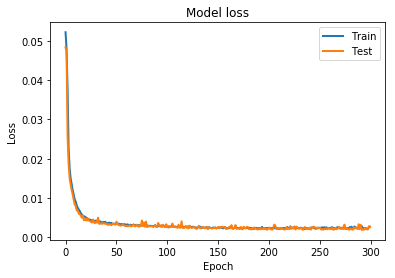

In [17]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

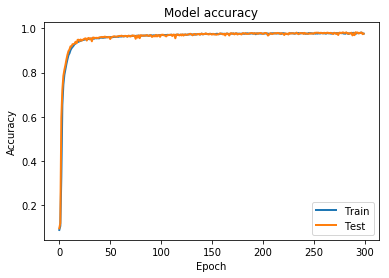

In [18]:
plt.plot(history['acc'], linewidth=2, label='Train')
plt.plot(history['val_acc'], linewidth=2, label='Test')
plt.legend(loc='lower right')
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()